<a href="https://colab.research.google.com/github/danielsoy/ALOCC-CVPR2018/blob/master/kaggle_cepillo_anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/pill'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/MyDrive/pill/readme.txt
/content/drive/MyDrive/pill/license.txt
/content/drive/MyDrive/pill/test/color/009.png
/content/drive/MyDrive/pill/test/color/003.png
/content/drive/MyDrive/pill/test/color/022.png
/content/drive/MyDrive/pill/test/color/004.png
/content/drive/MyDrive/pill/test/color/015.png
/content/drive/MyDrive/pill/test/color/021.png
/content/drive/MyDrive/pill/test/color/000.png
/content/drive/MyDrive/pill/test/color/005.png
/content/drive/MyDrive/pill/test/color/008.png
/content/drive/MyDrive/pill/test/color/012.png
/content/drive/MyDrive/pill/test/color/023.png
/content/drive/MyDrive/pill/test/color/024.png
/content/drive/MyDrive/pill/test/color/007.png
/content/drive/MyDrive/pill/test/color/019.png
/content/drive/MyDrive/pill/test/color/011.png
/content/drive/MyDrive/pill/test/color/010.png
/content/drive/MyDrive/pill/test/color/018.png
/content/drive/MyDrive/pill/test/color/020.png
/content/drive/MyDrive/pill/test/color/001.png
/content/drive/MyDrive/pill/

In [6]:
# Convolution Neural Network
# Src for dataset:
# https://www.mvtec.com/company/research/datasets/mvtec-ad
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve, auc, f1_score, roc_auc_score, precision_recall_curve,  \
    accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import shutil
import sys
from distutils.dir_util import copy_tree



# Directory setup
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
print(nb_dir)

/


In [7]:
import os    
os.environ['THEANO_FLAGS'] = "device=gpu1"  
#import theano
#theano.config.device = 'gpu'
#theano.config.floatX = 'float32'

In [9]:
ROOT_FOLDER_OF_TYPE = '/content/drive/MyDrive/pill'
CASE_FOLDER = "case_folder_2"

while os.path.exists(CASE_FOLDER):
    CASE_FOLDER += "_1"

if not os.path.exists(CASE_FOLDER):
    os.makedirs(CASE_FOLDER)

# Copy samples
copy_tree(ROOT_FOLDER_OF_TYPE + '/train/good', CASE_FOLDER + '/test/good')
copy_tree(ROOT_FOLDER_OF_TYPE + '/test/crack', CASE_FOLDER + '/test/crack')
copy_tree(ROOT_FOLDER_OF_TYPE + '/test/good', CASE_FOLDER + '/train/good')

['case_folder_2_1/train/good/007.png',
 'case_folder_2_1/train/good/014.png',
 'case_folder_2_1/train/good/013.png',
 'case_folder_2_1/train/good/001.png',
 'case_folder_2_1/train/good/012.png',
 'case_folder_2_1/train/good/018.png',
 'case_folder_2_1/train/good/025.png',
 'case_folder_2_1/train/good/005.png',
 'case_folder_2_1/train/good/010.png',
 'case_folder_2_1/train/good/023.png',
 'case_folder_2_1/train/good/000.png',
 'case_folder_2_1/train/good/006.png',
 'case_folder_2_1/train/good/021.png',
 'case_folder_2_1/train/good/015.png',
 'case_folder_2_1/train/good/009.png',
 'case_folder_2_1/train/good/002.png',
 'case_folder_2_1/train/good/022.png',
 'case_folder_2_1/train/good/004.png',
 'case_folder_2_1/train/good/019.png',
 'case_folder_2_1/train/good/024.png',
 'case_folder_2_1/train/good/017.png',
 'case_folder_2_1/train/good/020.png',
 'case_folder_2_1/train/good/016.png',
 'case_folder_2_1/train/good/003.png',
 'case_folder_2_1/train/good/008.png',
 'case_folder_2_1/train/g

In [19]:
IMAGE_SIZE = 256

train_batchsize = 20 #120
val_batchsize = 4

TRAIN_DIR = CASE_FOLDER + '/train'
VALID_DIR = CASE_FOLDER + '/test'

train_datagen = ImageDataGenerator(rescale = 1/(255))
validation_datagen = ImageDataGenerator(rescale = 1/(255))

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    classes = ['crack', 'good'],
    target_size= (IMAGE_SIZE, IMAGE_SIZE),  # All images will be resized to 512x512
    batch_size= train_batchsize,
    class_mode='binary')
print("Train done...")

validation_generator = validation_datagen.flow_from_directory(
    VALID_DIR,
    classes = ['crack', 'good'],
    target_size= (IMAGE_SIZE, IMAGE_SIZE),
    batch_size= val_batchsize,
    class_mode= 'binary',
    shuffle= False)
print("Vailidation done...")

Found 26 images belonging to 2 classes.
Train done...
Found 293 images belonging to 2 classes.
Vailidation done...


In [20]:
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
tf.keras.layers.MaxPooling2D(2, 2)

In [21]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 512x512 with 3 bytes color
    # 1st convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 2nd convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 3rd convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 4th convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 5th convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(IMAGE_SIZE, activation='relu'),
    # Only 1 output neuron. 
    # It will contain a value from 0-1 where 0 for 1 class ('dandelions') and 1 for the other ('grass')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
#model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])
# Changed to Adam optimizer and categorical corssentropy: gives ROC 62%, better than 56% though
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)      

In [24]:
steps_per_epoch = train_generator.samples//train_generator.batch_size
validation_steps = validation_generator.samples//validation_generator.batch_size
print("Steps per epoch", steps_per_epoch, "Validation steps", validation_steps)

history = model.fit(train_generator, 
    steps_per_epoch=10,
    epochs=15,
    validation_data=validation_generator, 
    validation_steps=validation_steps,
    verbose=1)

model.evaluate(validation_generator)

#STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
#validation_generator.reset()

preds = model.predict(x=validation_generator, verbose=1)
y_pred = preds.argmax(axis=1)

Steps per epoch 1 Validation steps 73
Epoch 1/15
74/74 [==============================] - 14s 184ms/step


In [25]:
fpr, tpr, _thresholds = roc_curve(validation_generator.classes, preds)
roc_auc = auc(fpr, tpr)

print(">>>> Confusion matrix")
print(confusion_matrix(validation_generator.classes, y_pred))

print(">>>> Accuracy %.2f" % accuracy_score(validation_generator.classes, y_pred))
print(">>>> Precision %.2f" % precision_score(validation_generator.classes, y_pred, average='macro'))
print(">>>> Recall %.2f" % recall_score(validation_generator.classes, y_pred, average='macro'))
print(">>>> F1_score %.2f" % f1_score(validation_generator.classes, y_pred, average='macro'))
print('>>>> ROC AUC: %0.2f' % roc_auc)

>>>> Confusion matrix
[[ 26   0]
 [267   0]]
>>>> Accuracy 0.09
>>>> Precision 0.04
>>>> Recall 0.50
>>>> F1_score 0.08
>>>> ROC AUC: 0.46


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


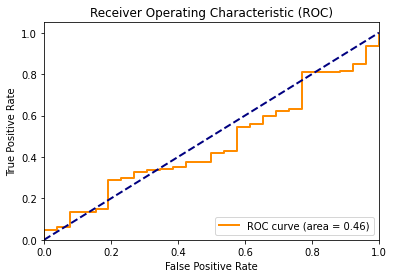

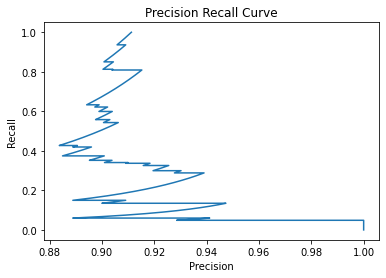

In [26]:
# Plot the ROC
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot the Precision / Recall
plt.figure()
precision, recall, _ = precision_recall_curve(validation_generator.classes, preds)
plt.plot(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision Recall Curve')
plt.show()